**Mini-project**  in order to classify Black and White images of clothing by using a standard dataset known as Fashion_MNIST clothing. Using CNN we will develop, evaluate, train  and save the model from scratch and then load it the make predictions on new data.


1.   Clothing images classification
2.   Model Evaluation
3.   Baseline Model
4.   Improved Model
5.   Finalize and Make Model predictions

*DATASET DESCRIPTION*: 

---

The Fashion_MNIST dataset comprised of 60,0000 small square 28 x 28 pixel grayscale images of 10 types of items as shown below:

*   0: T-shirt/top
*   1: Trouser
*   2: Pullover
*   3: Dress
*   4: Coat
*   5: Sandal
*   6: Shirt
*   7: Sneaker
*   8: Bag
*   9: Ankle boot


In [14]:
%cd /content/drive/MyDrive/DATA SCIENCES/Colab/Fashion_MNIST/

/content/drive/MyDrive/DATA SCIENCES/Colab/Fashion_MNIST


In [15]:
import os
os.getcwd()

'/content/drive/MyDrive/DATA SCIENCES/Colab/Fashion_MNIST'

In [16]:
print(os.listdir())

['f_MNiST.ipynb']


In [17]:
#Change PATH
path = os.getcwd()
csquare_01 = "f_MNiST.ipynb"
new_path = os.path.join(path,csquare_01)
print(new_path)

/content/drive/MyDrive/DATA SCIENCES/Colab/Fashion_MNIST/f_MNiST.ipynb


In [18]:
!ls

f_MNiST.ipynb


In [19]:
# Check for GPU
!nvidia-smi

Sat Sep 11 16:59:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |   2792MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
%tensorflow_version 2.x

In [21]:
import tensorflow as tf

In [22]:
tf.__version__   #Tensorflow version

'2.6.0'

In [23]:
tf.keras.__version__    #Keras version

'2.6.0'

In [24]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [25]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [26]:
# Checking for different device
CheckList = ["GPU","CPU"]
for device in CheckList:
  out_ = tf.config.list_physical_devices(device)
  if len(out_) > 0:
    print(f"{device} is available")
    print("details\n",out_)
  else:
    print(f"{device} not available")

GPU is available
details
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## IMAGE CLASSIFICATION

Train: X=(60000, 28, 28), y=(10000, 28, 28)
Test: X=(60000,), y=(10000,)


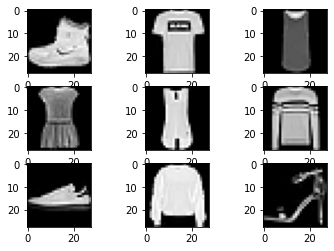

In [27]:
# Loading the MNIST dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
#import numpy as np
#load dataset
(X_train, X_test), (y_train, y_test) = fashion_mnist.load_data()
#summarize the loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # plot raw pixel data
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

Notice:
The ouput shows that there are 60,000 items in the training dataset and 10,000 in the test dataset and that images are square with 28 ×28 pixels. However the plot showing only nine grayscale images of items of clothing.


# MODEL EVALUATION
## - Let create a Baseline cnn Model


*  Adding Padding on dataset evaluated using k-Fold Cross-Validation. 
*  Improved Model to set number of filters in the convolutional layer to 64.


    

> 91.067
> 91.858
> 91.992
> 90.800
> 91.017


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


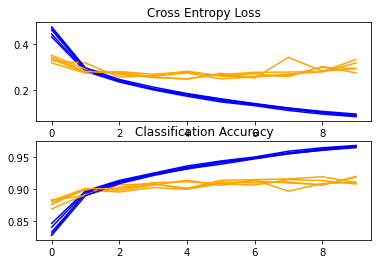

Accuracy: mean=91.347 std=0.482, n=5


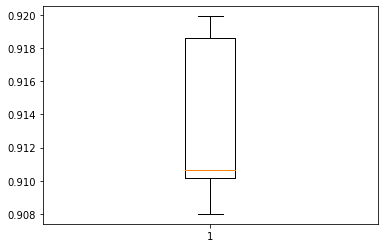

In [37]:
# Let import some librairies
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Load train and test dataset
def load_dataset():
  #Load dataset
  (X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
  # Reshape dataset to have a single channel
  X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
  X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
  # One-hot encode target values
  Y_train = to_categorical(Y_train)
  Y_test = to_categorical(Y_test)
  return X_train, Y_train, X_test, Y_test

# Scale pixels
def prep_pixels(train, test):
  # Convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  #Normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm
  
# Define CNN Model
def define_model():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation= 'relu', padding='same', kernel_initializer= 'he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(300, activation= 'relu', kernel_initializer= 'he_uniform'))
  model.add(Dense(100, activation= 'relu'))
  model.add(Dense(10, activation= 'softmax'))

  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy' , metrics=['accuracy'])
  return model

# Evaluate a model using k-fold cross-validation
def evaluate_model(X_data, Y_data, n_folds=5):
  scores, histories = list(), list()
  #Prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # Enumerate splits
  for ix_train, ix_test in kfold.split(X_data):
    # Define model
    model = define_model()
    # Select rows for train and test
    X_train, Y_train, X_test, Y_test = X_data[ix_train], Y_data[ix_train], X_data[ix_test], Y_data[ix_test]
    # Fit model
    history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test,Y_test), verbose=0)
    # Evaluate model
    _, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # Append scores
    scores.append(acc)
    histories.append(history)
  return scores, histories

# Plot diagnostic learning curves
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    # Plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    # Plot Accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

# Summarize model performance
def summarize_performance(scores):
  # Print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  # Box and Whisker plots of results
  plt.boxplot(scores)
  plt.show()

# Run the test harness for evaluating a model
def run_test_harness():
  # Load dataset
  X_train, Y_train, X_test, Y_test = load_dataset()
  # Prepare pixel data
  X_train, X_test = prep_pixels(X_train, X_test)
  # Evaluate model
  scores, histories = evaluate_model(X_train, Y_train)
  # Learning curves
  summarize_diagnostics(histories)
  # Summarize estimated performance
  summarize_performance(scores)

# Entry point, run the test harness
run_test_harness()

In [40]:
model.layers

NameError: ignored

**NOTE**: 
The model generally achieves a good fit, with train and test learning curves converging. There may not be some signs of slight overfitting/underfitting.

# Finalize the Model and Make Predictions

In [38]:
# Redefined cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(300, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(100, activation= 'relu'))
  model.add(Dense(10, activation='softmax'))
  #compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Run the test harness for evaluating a model
def run_test_harness():
  # Load dataset
  X_train, Y_train, X_test, Y_test = load_dataset()
  # Prepare pixel data
  X_train, X_test = prep_pixels(X_train, X_test)
  # define model
  model = define_model()
  # fit model
  model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=0)
  #save model
  model.save('fashionMNIST_finalModel.h5')

# Entry point, run the test harness
run_test_harness()


In [41]:
# Run the test harness for evaluating a model
from tensorflow.keras.models import load_model

def run_test_harness():
  # Load dataset
  X_train, Y_train, X_test, Y_test = load_dataset()
  # Prepare pixel data
  X_train, X_test = prep_pixels(X_train, X_test)
  # load model
  model = load_model('fashionMNIST_finalModel.h5')
  # Evaluate model on test dataset
  _, acc = model.evaluate(X_test, Y_test, verbose=0)
  print('> %.3f' % (acc * 100.0))

# Entry point, run the test harness
run_test_harness()

> 91.330


The accuracy of 91.330% and less than 9% classification error